In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# Load the dataset
data = pd.read_csv('TSLA.csv')
df=data.head()
print(df)



         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [3]:
# Let's assume the dataset has 'Date' and 'Close' columns, where 'Date' is the date of the stock data and 'Close' is the closing price.
# You might need to preprocess the dataset further depending on its structure.

# Extract features and target variable
X = data[[ 'High' , 'Low' , 'Adj Close' , 'Volume']]
y = data['Close']



In [4]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Mean Squared Error: 17.542993275926424
R2 Score: 0.9697172173152024


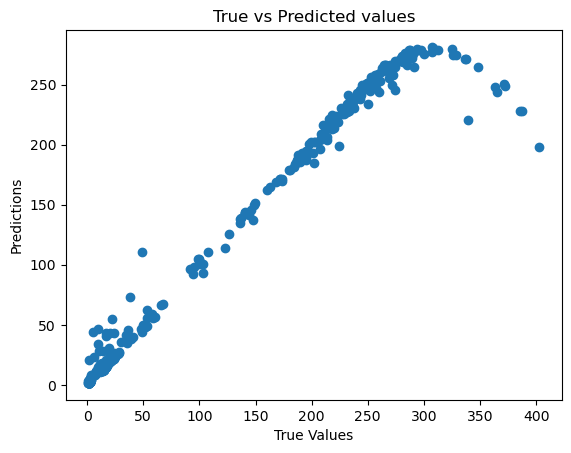

In [7]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Initialize SVR
regressor = SVR(kernel='rbf')  # Radial Basis Function kernel

# Fit the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the model
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error:", rmse)

#R2 score:

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


# Visualizing the results
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted values")
plt.show()